In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('hepatitis1.xlsx',  na_values="?" )

In [3]:
df['Steroid'].fillna(df.groupby('CLASS')['Steroid'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Fatique'].fillna(df.groupby('CLASS')['Fatique'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Malaise'].fillna(df.groupby('CLASS')['Malaise'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Anorexia'].fillna(df.groupby('CLASS')['Anorexia'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Liver Big'].fillna(df.groupby('CLASS')['Liver Big'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Liver Firm'].fillna(df.groupby('CLASS')['Liver Firm'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Spleen Palpable'].fillna(df.groupby('CLASS')['Spleen Palpable'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Speiders'].fillna(df.groupby('CLASS')['Speiders'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Ascites'].fillna(df.groupby('CLASS')['Ascites'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Varices'].fillna(df.groupby('CLASS')['Varices'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)

In [4]:
x = df.drop(columns=['#','CLASS'])

x = x.replace(to_replace = ['yes','no'],value = ['1','0'])

x["Bilirubin"] = x["Bilirubin"].fillna(df.groupby('CLASS')['Bilirubin'].transform('mean'))
x["Alk Phosphate"] = x["Alk Phosphate"].fillna(df.groupby('CLASS')['Alk Phosphate'].transform('mean'))
x["SGOT"] = x["SGOT"].fillna(df.groupby('CLASS')['SGOT'].transform('mean'))
x["Albumin"] = x["Albumin"].fillna(df.groupby('CLASS')['Albumin'].transform('mean'))
x["Protime"] = x["Protime"].fillna(df.groupby('CLASS')['Protime'].transform('mean'))

y = df['CLASS']

x2 = df.drop(columns=['#','CLASS'])
x2 = x2.replace(to_replace = ['yes','no'],value = ['1','0'])
y2 = df['CLASS']

In [5]:
kolom=['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatique', 'Malaise', 'Anorexia',
       'Liver Big','Liver Firm','Spleen Palpable','Speiders', 'Ascites','Varices',
       'Bilirubin','Alk Phosphate','SGOT','Albumin','Protime','Histology']

In [6]:
loo = LeaveOneOut()

true_y, pred_y = list(), list()
for train_index, test_index in loo.split(x):
    train_x, test_x = x.iloc[train_index, :], x2.iloc[test_index, :]
    train_y, test_y = y.iloc[train_index], y2.iloc[test_index]

    nan_values = test_x.isna()
    nan_columns = nan_values.any()
    columns_with_nan = test_x.columns[nan_columns].tolist()
    train_x = train_x.drop(columns_with_nan,axis = 1)
    test_x = test_x.dropna(axis='columns')


    #KNN Classifier
    classifier = tree.DecisionTreeClassifier()
    classifier.fit(train_x, train_y)

    # evaluate model
    yhat = classifier.predict(test_x)
    yhatt=yhat.tolist()
    test_yy=test_y.tolist()
    
    # store
    true_y.append(test_yy[0])
    pred_y.append(yhatt[0])

In [7]:
acc = accuracy_score(true_y, pred_y)
acc = acc*100
error = 100-acc
print(pred_y)
print('Accuracy: %.3f' % acc)
print('Accuracy: %.3f' % error)

print(classification_report(true_y, pred_y))

['Live', 'Die', 'Live', 'Live', 'Live', 'Live', 'Die', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Die', 'Live', 'Live', 'Die', 'Live', 'Die', 'Die', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Die', 'Die', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Die', 'Live', 'Live', 'Die', 'Die', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Die', 'Live', 'Live', 'Live', 'Die', 'Die', 'Live', 'Live', 'Die', 'Live', 'Live', 'Die', 'Live', 'Live', 'Die', 'Live', 'Live', 'Die', 'Die', 'Live', 'Die', 'Die', 'Live', 'Die', 'Die', 'Live', 'Live', 'Die', 'Live', 'Die', 'Live', 'Live', 'Die', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Live', 'Die', 'L

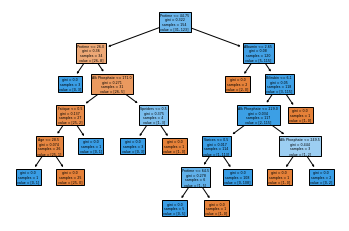

In [8]:
_ =tree.plot_tree(classifier,feature_names=kolom,
                  filled=True)
plt.show()